In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import src.util as util
from src.linear_model import LinearModel

In [14]:
class PoissonRegression(LinearModel):
    """Poisson Regression.

    Example usage:
        > clf = PoissonRegression(step_size=lr)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run gradient ascent to maximize likelihood for Poisson regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***
        m, n = x.shape
        if self.theta is None:
            self.theta = np.zeros(n)

        while True:
            gradient = np.dot(x.T , y - np.exp(np.dot(x, self.theta)))
            theta = self.theta + self.step_size / m * gradient

            if np.linalg.norm(theta - self.theta, ord = 1) < self.eps:
                self.theta = theta
                break
            self.theta = theta
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Floating-point prediction for each input, shape (m,).
        """
        # *** START CODE HERE ***
        return np.exp(np.dot(x, self.theta))
        # *** END CODE HERE ***

In [15]:
train_path = 'data/ds4_train.csv'
eval_path = 'data/ds4_valid.csv'

# Load training set
x_train, y_train = util.load_dataset(train_path, add_intercept=False)

lr = 2e-7
clf = PoissonRegression(step_size=lr)
clf.fit(x_train, y_train)

In [16]:
x_eval, y_eval = util.load_dataset(eval_path, add_intercept=False)
y = clf.predict(x_eval)

In [17]:
clf.theta

array([11.29965464, 10.79963034,  2.000159  ,  4.40029085])

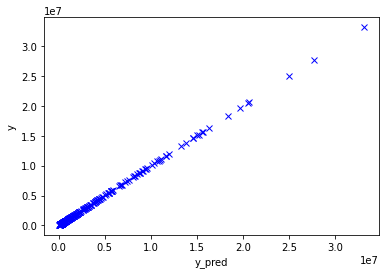

In [20]:
plt.figure()
plt.plot(y, y_eval, 'bx', linewidth=2)
plt.xlabel('y_pred')
plt.ylabel('y')
plt.savefig('p3_d')